<a href="https://colab.research.google.com/github/psyduck1203/Hands-on-ML-Basic-to-Advance-/blob/master/Bitcoin%20Price%20Predictor/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [24]:
data = pd.read_csv('/content/sample_data/BTC-USD.csv', date_parser = True)
data.tail()

<ipython-input-24-a59287c69fda>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('BTC-USD.csv', date_parser = True)


,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-05-27,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


#  Include More Features

In [25]:
# Add features like Volume, MA7, MA14, MA21, RSI, and MACD

# Calculating Moving Averages
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA14'] = data['Close'].rolling(window=14).mean()
data['MA21'] = data['Close'].rolling(window=21).mean()

# Calculating RSI
def compute_RSI(data, time_window):
    diff = data.diff(1).dropna()
    gain = (diff.where(diff > 0, 0)).rolling(window=time_window).mean()
    loss = (-diff.where(diff < 0, 0)).rolling(window=time_window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

data['RSI'] = compute_RSI(data['Close'], 14)

# Calculating MACD
data['26EMA'] = data['Close'].ewm(span=26).mean()
data['12EMA'] = data['Close'].ewm(span=12).mean()
data['MACD'] = data['12EMA'] - data['26EMA']
data['Signal_Line'] = data['MACD'].ewm(span=9).mean()

# Dropping intermediary columns used for MACD calculation
data = data.drop(['26EMA', '12EMA'], axis=1)


# Feature Engineering

In [26]:
# Calculate and add percentage changes for the Close price
data['Pct_Change'] = data['Close'].pct_change()

# Compute rolling averages and volatility measures over different windows
# Rolling standard deviation as a measure of volatility
data['Volatility_7'] = data['Close'].rolling(window=7).std()
data['Volatility_14'] = data['Close'].rolling(window=14).std()

# Forward-fill any NaN values resulting from moving averages, RSI, MACD, and volatility calculations
data = data.fillna(method='ffill')


In [27]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA14,MA21,RSI,MACD,Signal_Line,Pct_Change,Volatility_7,Volatility_14
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,NaN,NaN,NaN,NaN,-0.738007,-0.410004,-0.071926,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,NaN,NaN,NaN,NaN,-1.859626,-1.004111,-0.069843,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,NaN,NaN,NaN,NaN,-1.814822,-1.278742,0.035735,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,NaN,NaN,NaN,NaN,-2.153494,-1.538961,-0.024659,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10,7312.159877,7195.253837,7250.638184,50.489893,-86.832677,-135.058539,0.007062,102.975718,205.719650
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10,7330.278669,7209.062151,7239.293062,54.918076,-76.325964,-123.312024,0.003827,88.240829,207.101012
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10,7317.573521,7228.372942,7232.545805,56.618463,-58.875243,-110.424668,0.014302,59.509545,213.894172
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10,7308.625907,7254.123989,7227.407506,59.233372,-54.875149,-99.314764,-0.017468,57.509158,196.527423


In [28]:
data_test = data[data['Date']> '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA14,MA21,RSI,MACD,Signal_Line,Pct_Change,Volatility_7,Volatility_14
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10,7243.281459,7272.629813,7210.291434,41.446690,-79.166603,-84.018507,-0.029819,137.362673,122.911400
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10,7251.109445,7281.634661,7213.872373,53.905102,-63.736756,-79.962157,0.051452,141.959106,123.283090
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10,7264.347517,7297.313093,7227.490606,56.642367,-45.674694,-73.104664,0.008955,153.117548,124.839211
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10,7262.728167,7290.150844,7239.824684,46.237435,-30.950295,-64.673790,0.000089,151.212385,114.006570
1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10,7330.760184,7319.693045,7279.669387,63.477021,9.489201,-49.841192,0.048291,245.088332,171.412302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10,9446.137137,9285.327427,9307.839053,44.809861,308.592070,409.097924,0.002909,280.879826,376.632842
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10,9320.369838,9287.751535,9302.739025,50.516294,244.373103,376.152960,-0.045489,351.716221,373.059130
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10,9203.278320,9309.547154,9302.466657,54.696496,200.572963,341.036960,0.013261,329.691463,337.078652
2078,2020-05-26,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10,9203.278320,9309.547154,9302.466657,54.696496,200.572963,312.944161,0.000000,329.691463,337.078652


In [29]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume,MA7,MA14,MA21,RSI,MACD,Signal_Line,Pct_Change,Volatility_7,Volatility_14
0,465.864014,468.174011,452.421997,457.334015,21056800.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
1,456.859985,456.859985,413.104004,424.440002,34483200.0,NaN,NaN,NaN,NaN,-0.738007,-0.410004,-0.071926,NaN,NaN
2,424.102997,427.834991,384.532013,394.795990,37919700.0,NaN,NaN,NaN,NaN,-1.859626,-1.004111,-0.069843,NaN,NaN
3,394.673004,423.295990,389.882996,408.903992,36863600.0,NaN,NaN,NaN,NaN,-1.814822,-1.278742,0.035735,NaN,NaN
4,408.084991,412.425995,393.181000,398.821014,26580100.0,NaN,NaN,NaN,NaN,-2.153494,-1.538961,-0.024659,NaN,NaN


# Data Normalization

In [30]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01497323, 0.01290132, 0.01494007, ...,        nan,        nan,
               nan],
       [0.01450668, 0.01233213, 0.01284898, ..., 0.30074786,        nan,
               nan],
       [0.01280933, 0.01087192, 0.0113294 , ..., 0.30523771,        nan,
               nan],
       ...,
       [0.37000809, 0.36736522, 0.37805193, ..., 0.48661528, 0.02111909,
        0.07302856],
       [0.37532577, 0.36439076, 0.37786274, ..., 0.41813383, 0.02039573,
        0.06704209],
       [0.36880551, 0.35837715, 0.37219702, ..., 0.42640869, 0.02538462,
        0.03062852]])

In [31]:
X_train = []
Y_train = []

In [32]:
training_data.shape[0]

1932

In [33]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [34]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [35]:
X_train.shape

(1872, 60, 14)

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [42]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

In [43]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [44]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            13000     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [45]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
38/38 [==============================] - 13s 179ms/step - loss: nan
Epoch 2/20
38/38 [==============================] - 8s 216ms/step - loss: nan
Epoch 3/20
38/38 [==============================] - 8s 213ms/step - loss: nan
Epoch 4/20
38/38 [==============================] - 7s 178ms/step - loss: nan
Epoch 5/20
38/38 [==============================] - 8s 221ms/step - loss: nan
Epoch 6/20
38/38 [==============================] - 7s 178ms/step - loss: nan
Epoch 7/20
38/38 [==============================] - 8s 221ms/step - loss: nan
Epoch 8/20
38/38 [==============================] - 7s 179ms/step - loss: nan
Epoch 9/20
38/38 [==============================] - 8s 218ms/step - loss: nan
Epoch 10/20
38/38 [==============================] - 8s 213ms/step - loss: nan
Epoch 11/20
38/38 [==============================] - 7s 182ms/step - loss: nan
Epoch 12/20
38/38 [==============================] - 8s 223ms/step - loss: nan
Epoch 13/20
38/38 [==============================] - 7s 178m

In [49]:
past_60_days = data_training.tail(60)
df = pd.concat([past_60_days, data_test], ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()


,Open,High,Low,Close,Volume,MA7,MA14,MA21,RSI,MACD,Signal_Line,Pct_Change,Volatility_7,Volatility_14
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10,9318.097796,8763.180001,8557.085124,67.200970,207.767629,70.066481,0.006869,129.350427,717.970573
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10,9272.903460,8835.556885,8600.625535,63.547183,212.659023,98.584989,-0.009583,79.959397,710.259021
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10,9295.255441,8919.049142,8650.050572,65.003409,228.208072,124.509606,0.019193,94.957521,704.011139
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10,9283.089704,9009.358015,8704.200963,66.635901,232.198890,146.047463,-0.007446,79.332561,668.024870
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10,9305.254464,9141.230015,8766.741583,78.361238,234.143478,163.666666,0.001964,75.706947,514.957935


In [50]:
inputs = scaler.transform(df)
inputs

array([[0.4706426 , 0.46111744, 0.48280998, ..., 0.47059264, 0.04637442,
        0.24678802],
       [0.47401087, 0.46123417, 0.47704822, ..., 0.4351289 , 0.02851401,
        0.24412979],
       [0.4693899 , 0.46753509, 0.47971984, ..., 0.49715869, 0.03393752,
        0.24197609],
       ...,
       [0.44609842, 0.43966175, 0.45462663, ..., 0.4843705 , 0.11882021,
        0.11549131],
       [0.44609842, 0.43966175, 0.45462663, ..., 0.45578651, 0.11882021,
        0.11549131],
       [0.44858819, 0.43506214, 0.46071565, ..., 0.44367433, 0.11882021,
        0.11549131]])

In [51]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [52]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((147, 60, 14), (147,))

In [53]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

5/5 [==============================] - 1s 44ms/step


(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

In [55]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11, 5.60032345e-05, 5.85363870e-05, 6.14490733e-05,
       1.05189924e-02, 2.47751931e-04, 2.75026936e-04, 2.15554260e+00,
       3.61612348e-04, 3.44708582e-04])

In [56]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [57]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [58]:
Y_pred


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [59]:
Y_test

array([ 7025.65427061,  6807.5317115 ,  7168.47848868,  7233.55466072,
        7233.55514872,  7591.7851299 ,  7985.0385481 ,  7905.39889906,
        7701.41061796,  7985.2939191 ,  7856.36472004,  8012.87497412,
        7964.03610609,  8648.44675144,  8635.58444644,  8548.31296239,
        8750.31491549,  8764.5483145 ,  8527.73483738,  8482.09421236,
        8567.3139394 ,  8503.75339237,  8228.67038423,  8263.22214224,
        8187.51315721,  8420.41159533,  8735.62741549,  9180.57370472,
        9139.11960369,  9331.41647879,  9169.46042371,  9212.92331473,
        9167.78659571,  9115.94479868,  9006.51901763,  9440.92429085,
        9549.1059319 ,  9616.17331494,  9686.99753298,  9938.6625721 ,
        9678.99460397, 10025.49069715, 10147.06394021, 10034.65378315,
       10136.95944721,  9712.28268999,  9759.66354901,  9514.33347089,
        9966.90183012,  9452.42819686,  9434.88522885,  9510.81003289,
        9486.42136087,  9744.68601001,  9474.41550187,  9161.39304071,
      

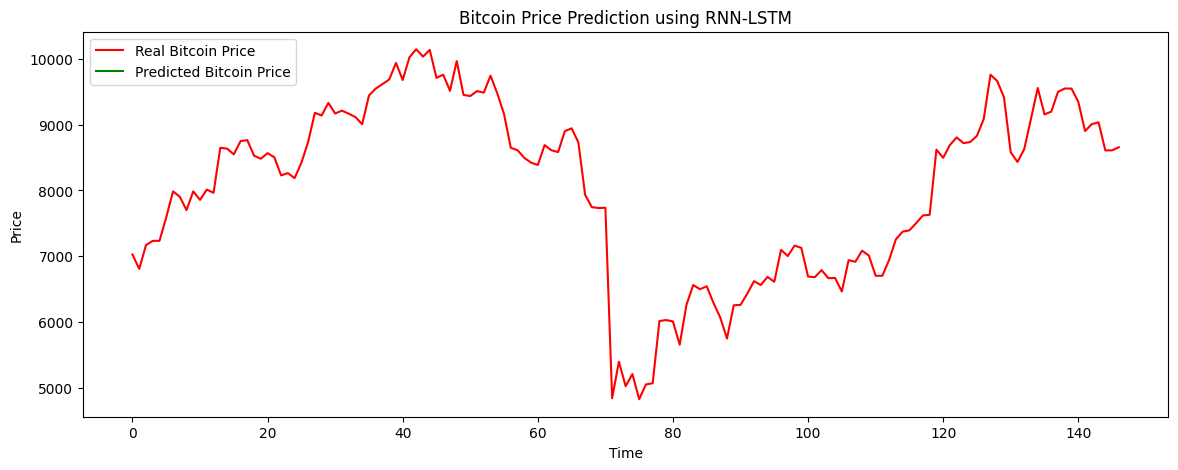

In [60]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()